In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
#change the directory to the one where the script is located
print("current directory: ", os.getcwd())
os.chdir("..")
print("changed directory to: ", os.getcwd())

current directory:  /Users/apple/Documents/GitHub/Rag/RAGApril/notebooks
changed directory to:  /Users/apple/Documents/GitHub/Rag/RAGApril


In [3]:
#load all the json results from extension/results/summary_evaluations_paperqa2 and create a dataframe

import pandas as pd
import json
import os
import glob
from pathlib import Path

def load_json_files_to_dataframe(directory_path):
    """
    Load all JSON files from the specified directory and create a pandas DataFrame.
    
    Args:
        directory_path (str): Path to the directory containing JSON files
        
    Returns:
        pd.DataFrame: DataFrame containing all the evaluation data
    """
    
    # List to store all data
    all_data = []
    
    # Check if directory exists
    if not os.path.exists(directory_path):
        print(f"Directory {directory_path} does not exist.")
        print("Please check the path or create the directory with JSON files.")
        return None
    
    # Find all JSON files in the directory
    json_files = glob.glob(os.path.join(directory_path, "*.json"))
    
    if not json_files:
        print(f"No JSON files found in {directory_path}")
        return None
    
    print(f"Found {len(json_files)} JSON files")
    
    # Load each JSON file
    for json_file in json_files:
        try:
            with open(json_file, 'r', encoding='utf-8') as f:
                data = json.load(f)
                
                # Handle both single objects and arrays
                if isinstance(data, list):
                    all_data.extend(data)
                else:
                    all_data.append(data)
                    
                print(f"Loaded {json_file}: {len(data) if isinstance(data, list) else 1} records")
                
        except json.JSONDecodeError as e:
            print(f"Error parsing JSON file {json_file}: {e}")
            continue
        except Exception as e:
            print(f"Error reading file {json_file}: {e}")
            continue
    
    if not all_data:
        print("No valid data found in JSON files")
        return None
    
    print(f"Total records loaded: {len(all_data)}")

     # Create DataFrame
    df = pd.DataFrame(all_data)
    
    # Normalize nested evaluation data
    if 'evaluation' in df.columns:
        # Extract evaluation metrics into separate columns
        eval_df = pd.json_normalize(df['evaluation'])
        eval_df.columns = ['eval_' + col for col in eval_df.columns]
        
        # Combine with main dataframe
        df = pd.concat([df.drop('evaluation', axis=1), eval_df], axis=1)
    
    return df

In [4]:
df_ocr=load_json_files_to_dataframe("extension/results/summary_evaluations_paperqa2_ocr")

Found 105 JSON files
Loaded extension/results/summary_evaluations_paperqa2_ocr/ocr_summary_ZhxpBVdh.json: 1 records
Loaded extension/results/summary_evaluations_paperqa2_ocr/ocr_summary_6UFiboQe.json: 1 records
Loaded extension/results/summary_evaluations_paperqa2_ocr/ocr_summary_JYcqL4yH.json: 1 records
Loaded extension/results/summary_evaluations_paperqa2_ocr/ocr_summary_jbKD7mEi.json: 1 records
Loaded extension/results/summary_evaluations_paperqa2_ocr/ocr_summary_HSySuWXF.json: 1 records
Loaded extension/results/summary_evaluations_paperqa2_ocr/ocr_summary_kykrt5Lw.json: 1 records
Loaded extension/results/summary_evaluations_paperqa2_ocr/ocr_summary_fDgarSFB.json: 1 records
Loaded extension/results/summary_evaluations_paperqa2_ocr/ocr_summary_3vN3diuQ.json: 1 records
Loaded extension/results/summary_evaluations_paperqa2_ocr/ocr_summary_bEdsVyh7.json: 1 records
Loaded extension/results/summary_evaluations_paperqa2_ocr/ocr_summary_TBL9HxVt.json: 1 records
Loaded extension/results/summ

In [5]:
df=load_json_files_to_dataframe("extension/results/summary_evaluations_paperqa2")

Found 105 JSON files
Loaded extension/results/summary_evaluations_paperqa2/summary_jhKmd4iK.json: 1 records
Loaded extension/results/summary_evaluations_paperqa2/summary_gVvtqyWc.json: 1 records
Loaded extension/results/summary_evaluations_paperqa2/summary_Nxzb9AsA.json: 1 records
Loaded extension/results/summary_evaluations_paperqa2/summary_PQuCW7SD.json: 1 records
Loaded extension/results/summary_evaluations_paperqa2/summary_QEyBC5qu.json: 1 records
Loaded extension/results/summary_evaluations_paperqa2/summary_4oLQiMZG.json: 1 records
Loaded extension/results/summary_evaluations_paperqa2/summary_KDwMz3of.json: 1 records
Loaded extension/results/summary_evaluations_paperqa2/summary_8uhHaBJm.json: 1 records
Loaded extension/results/summary_evaluations_paperqa2/summary_ZDQ2B6Lc.json: 1 records
Loaded extension/results/summary_evaluations_paperqa2/summary_iavGA2MZ.json: 1 records
Loaded extension/results/summary_evaluations_paperqa2/summary_8MrcUcCf.json: 1 records
Loaded extension/resul

In [6]:
def display_dataframe_info(df):
    """
    Display information about the created DataFrame.
    
    Args:
        df (pd.DataFrame): The DataFrame to analyze
    """
    if df is None:
        return
        
    print("\n" + "="*50)
    print("DATAFRAME INFORMATION")
    print("="*50)
    
    print(f"Shape: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    
    print("\nColumn Types:")
    print(df.dtypes)
    
    print("\nFirst few rows:")
    print(df.head())
    
    if 'eval_conciseness_score' in df.columns:
        print("\nEvaluation Score Statistics:")
        score_columns = [col for col in df.columns if col.startswith('eval_') and col.endswith('_score')]
        print(df[score_columns].describe())
    
    print("\nMissing values:")
    print(df.isnull().sum())

In [7]:
#check if the question is unique
def check_unique_questions(df):
    """
    Check if the questions in the DataFrame are unique.
    
    Args:
        df (pd.DataFrame): The DataFrame to analyze
        
    Returns:
        bool: True if questions are unique, False otherwise
    """
    if df is None:
        return False
    
    unique_questions = df['question'].nunique()
    total_questions = len(df)
    
    print(f"Unique questions: {unique_questions} out of {total_questions}")
    
    return unique_questions == total_questions

#check if the questions are unique
unique = check_unique_questions(df)
#remove duplicates if they are not unique
if not unique:
    df = df.drop_duplicates(subset=['question'])
    print(f"Removed duplicates. New shape: {df.shape}")
else:
    print("No duplicates found. DataFrame is unique.")

Unique questions: 105 out of 105
No duplicates found. DataFrame is unique.


In [8]:
pd.options.display.max_colwidth=100

In [9]:
#find the number of paperqa2 response contains "I cannot answer."


count = df[df['paperqa2_answer'].str.contains("I cannot answer", na=False)]

print(f"Number of responses containing 'I cannot answer.': {len(count)} in paperqa2")

count_ocr=df_ocr[df_ocr['paperqa2_ocr_answer'].str.contains("I cannot answer", na=False)]
print(f"Number of responses containing 'I cannot answer.': {len(count_ocr)} in paperqa2_ocr")


  

Number of responses containing 'I cannot answer.': 11 in paperqa2
Number of responses containing 'I cannot answer.': 5 in paperqa2_ocr


In [10]:
#calculate the average of the evaluation scores

AI_score_columns=['eval_conciseness_score','eval_accuracy_score', 'eval_citation_score']
human_score_columns=['eval_manual_score']

print("AI score average in ocr: ", df_ocr[AI_score_columns].mean().sum())
print("AI score average in paperqa2: ", df[AI_score_columns].mean().sum())
#print("Human score average: ", df[human_score_columns].mean())

AI score average in ocr:  63.71428571428571
AI score average in paperqa2:  53.0


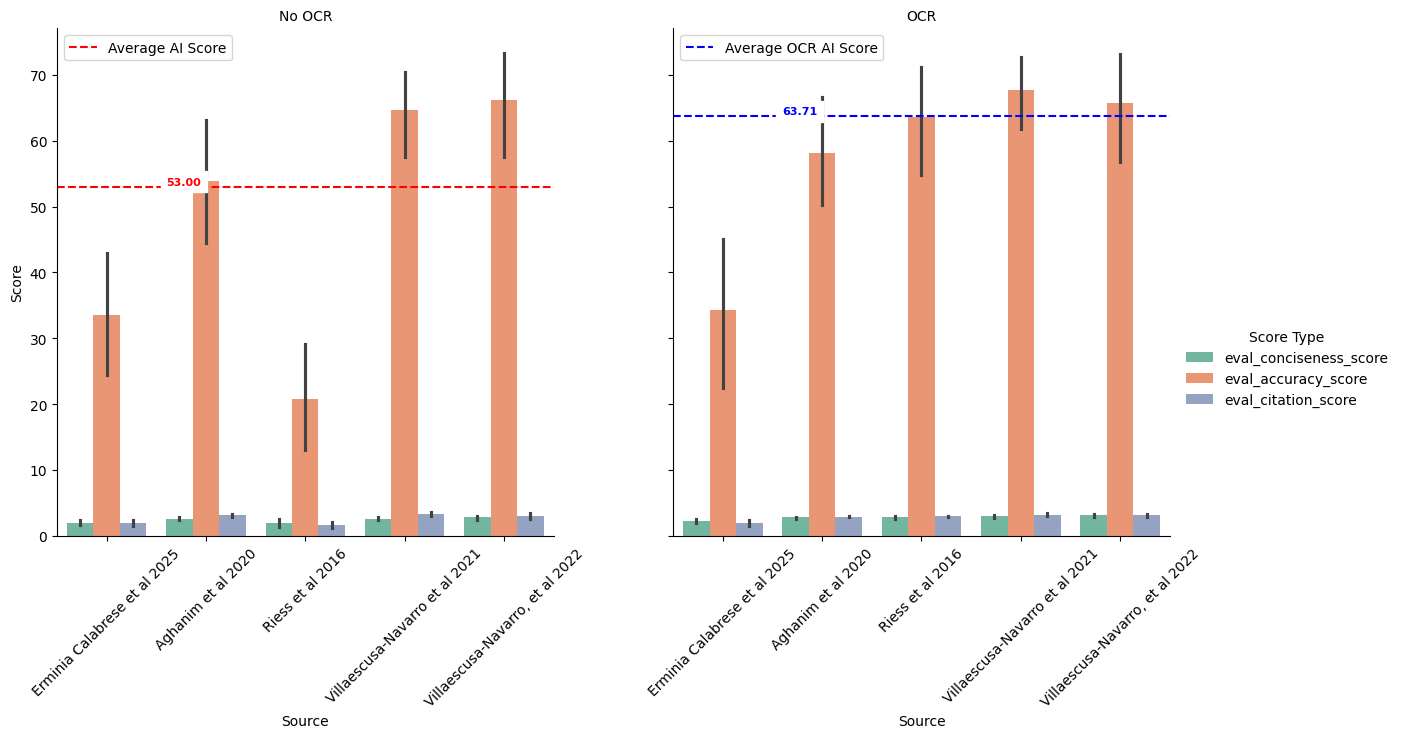

In [13]:
# a comparison of the accuracy score between paperqa2 and paperqa2_ocr

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculate AI_score_sum for both dataframes
AI_score_columns = ['eval_conciseness_score', 'eval_accuracy_score', 'eval_citation_score']

# 2. Map source_file to year
def change_source_file(source_file):
    if source_file=='https://arxiv.org/abs/1807.06209v4':
        return 'Aghanim et al 2020'
    elif source_file=='https://arxiv.org/abs/2010.00619v2':
        return 'Villaescusa-Navarro et al 2021'
    elif source_file=='https://arxiv.org/abs/2201.02202v1':
        return 'Villaescusa-Navarro, et al 2022'
    elif source_file=='https://arxiv.org/abs/1604.01424v3':
        return 'Riess et al 2016' 
    else:
        return 'Erminia Calabrese et al 2025'

df['source'] = df['source_file'].apply(change_source_file)
df_ocr['source'] = df_ocr['source_file'].apply(change_source_file)

# 3. Prepare for melting and plotting
score_columns = ['eval_conciseness_score', 'eval_accuracy_score', 'eval_citation_score']

# Add a column to distinguish OCR vs non-OCR
df['Type'] = 'No OCR'
df_ocr['Type'] = 'OCR'

# Combine both dataframes
combined = pd.concat([df[['eval_conciseness_score', 'eval_accuracy_score', 'eval_citation_score', 'source', 'Type']],
                      df_ocr[['eval_conciseness_score', 'eval_accuracy_score', 'eval_citation_score', 'source', 'Type']]])

# Melt for seaborn
melted = combined.melt(id_vars=['source', 'Type'], value_vars=score_columns,
                       var_name='Score Type', value_name='Score')

# Add facet for OCR vs No OCR
g = sns.catplot(
    data=melted, kind="bar",
    x="source", y="Score", hue="Score Type",
    col="Type", palette="Set2", height=6, aspect=1
)
g.set_titles("{col_name}")

# Add average lines to the correct subplot
# For "No OCR"
avg_no_ocr = df[AI_score_columns].mean().sum()
g.axes[0, 0].axhline(y=avg_no_ocr, color='red', linestyle='--', label='Average AI Score')
g.axes[0, 0].legend()
g.axes[0, 0].text(
    0.95, avg_no_ocr, f"{avg_no_ocr:.2f}", 
    color='red', fontsize=8, fontweight='bold', 
    va='bottom', ha='right', 
    backgroundcolor='white'
)


# For "OCR"
avg_ocr = df_ocr[AI_score_columns].mean().sum()
line = g.axes[0, 1].axhline(y=avg_ocr, color='blue', linestyle='--', label='Average OCR AI Score')


# Add a custom legend with only the average line
g.axes[0, 1].legend([line], ['Average OCR AI Score'])
g.axes[0, 1].text(
    0.95, avg_ocr, f"{avg_ocr:.2f}", 
    color='blue', fontsize=8, fontweight='bold', 
    va='bottom', ha='right', 
    backgroundcolor='white'
)

g.set_axis_labels("Source", "Score")
g.set_xticklabels(rotation=45)
plt.show()